<font color=#0000FF size=10 face="Times New Roman">Title: </font>

<font color=#0000FF size=6 face="Times New Roman">Identifcation of network topology structural by spectral entropy</font>

<font color=#000000 size=5 face="Times New Roman">Author: </font>

<font color=#000000 size=5 face="Times New Roman">Dan Chen, Housheng Su, Minghui Yu and Gui-Jun Pan</font>

<font color=#6495ED size=6 face="Times New Roman">Introduction: </font>

<font color=#6495ED size=4 face="Times New Roman">This project provides some of the python source code used in this paper, and you can run it online with Jupyter Notebook and even extend it for research on other projects.</font>

# 1. Methods

### (1) B spectral entropy (BE, Braunstein *et al*)
For a undirected network, the Laplacian matrix $L$ is symmetric and positive semidefinite, $L = D - A$, with $A$ the adjacency matrix of the network and $D$ the diagonal matrix of node degrees. Considering that its trace is equal to the sum of each vertex degree of a graph, it is not equal to unity, so defined by $\rho = L/Z$, $Z = TrL$. 

Then the von Neumann entropy of an $N \times N$ density matrix $\rho$ is $S\left(\rho \right) =  - Tr\left( {\rho \log _2 \rho} \right) =  - \sum\limits_{i = 1}^N {\lambda _i \left(\rho \right)\log _2 \lambda _i \left(\rho \right)}$, where by convention $0\log _2 0: = 0$, $\lambda _i \left(\rho \right)$ indicates the $i$th eigenvalue of the density matrix $\rho$. So the B spectral entropy (BE) of the network can be reduced to 

$S_b  = \log _2 Z - \frac{1}{{Z\ln 2}}\sum\limits_{i = 1}^N {\lambda _i \left( L \right)\ln \lambda _i \left( L \right)}$.-----------------(1)


### References

[1] Braunstein S L, Ghosh S and Severini S 2006 The laplacian of a graph as a density matrix: a basic combinatorial approach to separability of mixed states *Ann. Comb.* 10 291

[2] Anand K, Bianconi G and Severini S 2011 Shannon and von neumann entropy of random networks with heterogeneous expected degree *Phys. Rev.* E 83 036109

### (2) D spectral entropy (DE, De Domenico *et al*)
Using the statistical distribution $P_i  = Z^{ - 1} e^{ - \beta E_i }$ in classical statistical physics and $H\left| {\psi _i } \right\rangle
= E_i \left| {\psi _i } \right\rangle$, $\rho$ can be written as $\rho = Z^{ - 1} e^{ - \beta H}$.

Recently, De Domenico *et al* introduced $H = L$ to define the density matrix as $\rho = Z^{ - 1} e^{ - \beta L}$, $\lambda _i \left(\rho \right) = Z^{ - 1} e^{ - \beta \lambda _i \left(L \right)}$, where $Z = \sum\limits_{i = 1}^N {e^{ - \beta \lambda _i \left(L \right)}}$. In this case, the spectral entropy (DE) can be expressed as

$S_d = \log _2 Z + \frac{1}{{Z\ln 2}}\sum\limits_{i = 1}^N {\beta \lambda _i \left( L \right)e^{ - \beta \lambda _i \left(L \right)}} = \log _2 Z + \frac{\beta }{{\ln 2}}Tr\left[ L\rho \right]$.-----------------(2)


### References
[1] De Domenico M and Biamonte J 2016 Spectral entropies as information-theoretic tools for complex network comparison *Phys. Rev.* X 6 041062

### (3) V spectral entropy (VE)
Estrada *et al* proposed the total energy and Helmholtz free energy of the network by introducing the Hamiltonian $H = -A$, the density matrix $\rho$ can be rewritten as

$\rho = \frac{{e^{ - \beta \left( { -A} \right)} }}{Z} = \frac{{e^{\beta A}}}{Z}, Z = Tre^{\beta A} = \sum\limits_{i = 1}^N {e^{\beta \lambda _i \left( A \right)}}$,-----------------(3)

where $\beta > 0$, it can be considered as the 'strength' of the interaction between a pair of vertices. We consider the spectral entropy (VE) under the density matrix $\rho = Z^{ - 1} e^{ \beta A}$, it as follows

$S_v = \log _2 Z - \frac{1}{{Z\ln 2}}\sum\limits_{i = 1}^N {\beta \lambda _i \left( A \right)e^{\beta \lambda _i \left(A \right)}} 
 = \log _2 Z - \frac{\beta }{{\ln 2}}Tr\left[A\rho \right]$.-----------------(4)
 
### References

[1] Estrada E, Hatano N and Benzi M 2012 The physics of communicability in complex networks *Phys. Rep.* 514 89-119

[2] Estrada E and Hatano N 2007 Statistical-mechanical approach to subgraph centrality in complex networks *Chem. Phys. Lett.* 439 247-51

# 2. Results

<font color=#DC143C size=4 face="Times New Roman">It should be noted that, unlike the results in this paper, the results presented in this project do not take into account statistical averages.</font>

## 2.1. Quantification heterogeneity of the degree distribution by spetral entropy

<font color=#DC143C size=4 face="Times New Roman">For spetral entropy BE, it is worth noting that the network sizes we consider here are $N=100$ to $N=1000$.</font>

In [1]:
import numpy as np
import networkx as nx
import function as fu
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline

### (1) Spetral entropy BE

In [2]:
nodes = [100,200,400,600,800,1000]
Sb_ER1 = []
Sb_BA1 = []
Sb_ER2 = []
Sb_BA2 = []
for n in nodes:
    # The average degree is 4
    G1 = nx.gnm_random_graph(n, 2*n)
    A1, L1 = fu.cal_AandL(G1)
    Sb_ER1.append(fu.cal_entropy1(L1)) 
    G2 = nx.barabasi_albert_graph(n, 2)
    A2, L2 = fu.cal_AandL(G2)
    Sb_BA1.append(fu.cal_entropy1(L2))
    
    # The average degree is 10
    G3 = nx.gnm_random_graph(n, 5*n)
    A3, L3 = fu.cal_AandL(G3)
    Sb_ER2.append(fu.cal_entropy1(L3)) 
    G4 = nx.barabasi_albert_graph(n, 5)
    A4, L4 = fu.cal_AandL(G4)
    Sb_BA2.append(fu.cal_entropy1(L4))

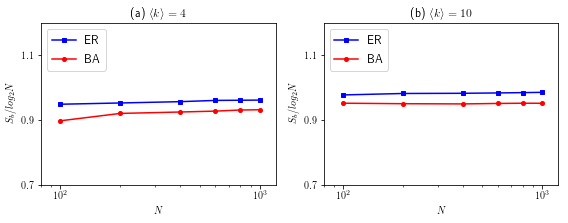

In [3]:
plt.figure(figsize=(8, 3.2))
plt.subplot(121)
plt.plot(nodes, Sb_ER1, color="blue",marker ="s", lw=1.5, ms=4, label='ER')
plt.plot(nodes, Sb_BA1, color="red",marker ="o", lw=1.5, ms=4, label='BA')

plt.legend(loc=2,fontsize=12)
plt.axis('tight')
plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$S_b/log_2N$')
plt.title(r'(a) $\left\langle k \right\rangle=4$')
plt.xlim(8e1,1.2e3)
plt.ylim(0.7,1.2)
plt.yticks([0.7,0.9,1.1])


plt.subplot(122)
plt.plot(nodes, Sb_ER2, color="blue",marker ="s", lw=1.5, ms=4, label='ER')
plt.plot(nodes, Sb_BA2, color="red",marker ="o", lw=1.5, ms=4, label='BA')

plt.legend(loc=2,fontsize=12)
plt.axis('tight')
plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$S_b/log_2N$')
plt.title(r'(b) $\left\langle k \right\rangle=10$')
plt.xlim(8e1,1.2e3)
plt.ylim(0.7,1.2)
plt.yticks([0.7,0.9,1.1])
plt.tight_layout()
plt.show()

### (2) Spetral entropy DE

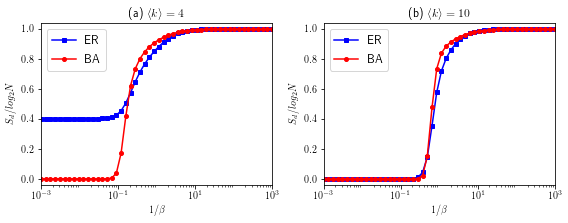

In [4]:
n = 1000
betaArray = np.logspace(3.0, -3.0, num=50, base=10)
Sd_ER1 = []
Sd_BA1 = []
Sd_ER2 = []
Sd_BA2 = []

# The average degree is 4
G5 = nx.gnm_random_graph(n, 2*n)
G6 = nx.barabasi_albert_graph(n, 2)
A5, L5 = fu.cal_AandL(G5)
A6, L6 = fu.cal_AandL(G6)

# The average degree is 10
G7 = nx.gnm_random_graph(n, 5*n)
G8 = nx.barabasi_albert_graph(n, 5)
A7, L7 = fu.cal_AandL(G7)
A8, L8 = fu.cal_AandL(G8)

for beta in betaArray:    
    Sd_ER1.append(fu.cal_entropy2(beta, L5))
    Sd_BA1.append(fu.cal_entropy2(beta, L6))
    
    Sd_ER2.append(fu.cal_entropy2(beta, L7))
    Sd_BA2.append(fu.cal_entropy2(beta, L8))

plt.figure(figsize=(8, 3.2))
plt.subplot(121)
plt.plot(1/betaArray, Sd_ER1, 'bs-', lw=1.5, ms=4, label='ER') 
plt.plot(1/betaArray, Sd_BA1, 'ro-', lw=1.5, ms=4, label='BA')

plt.legend(loc=0,fontsize=12)
plt.axis('tight')
plt.xscale('log')
plt.xlabel(r'$1/\beta$')
plt.ylabel(r'$S_d/log_2N$')
plt.title(r'(a) $\left\langle k \right\rangle=4$')

plt.xlim(1e-3,1e3)
plt.xticks([1e-3,1e-1,1e1,1e3])
plt.ylim(-0.04,1.04)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])


plt.subplot(122)
plt.plot(1/betaArray, Sd_ER2, 'bs-', lw=1.5, ms=4, label='ER') 
plt.plot(1/betaArray, Sd_BA2, 'ro-', lw=1.5, ms=4, label='BA')

plt.legend(loc=2,fontsize=12)
plt.axis('tight')
plt.xscale('log')
plt.xlabel(r'$1/\beta$')
plt.ylabel(r'$S_d/log_2N$')
plt.title(r'(b) $\left\langle k \right\rangle=10$')

plt.xlim(1e-3,1e3)
plt.xticks([1e-3,1e-1,1e1,1e3])
plt.ylim(-0.04,1.04)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])

plt.tight_layout()
plt.show()

### (3) Spetral entropy VE

<font color=#DC143C size=4 face="Times New Roman">When $\beta$ is very large, the calculation will overflow, but in fact, from a theoretical point of view, the result of spectral entropy $S_v/log_2N$ tends to 0.</font>

E:\Jupyter Notebook\INTS_by_spectral entropy\function.py:71: RuntimeWarning: invalid value encountered in double_scalars
  S2 = (np.sum(beta*eig*np.exp(-beta*eig), dtype=np.float64))/(Z*np.log(2.0))
E:\Jupyter Notebook\INTS_by_spectral entropy\function.py:71: RuntimeWarning: overflow encountered in multiply
  S2 = (np.sum(beta*eig*np.exp(-beta*eig), dtype=np.float64))/(Z*np.log(2.0))


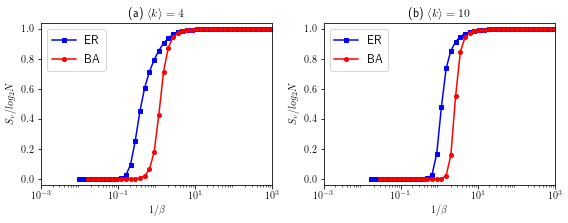

In [5]:
Sv_ER1 = []
Sv_BA1 = []
Sv_ER2 = []
Sv_BA2 = []
for beta in betaArray:    
    Sv_ER1.append(fu.cal_entropy2(beta, -A5))
    Sv_BA1.append(fu.cal_entropy2(beta, -A6))
    
    Sv_ER2.append(fu.cal_entropy2(beta, -A7))
    Sv_BA2.append(fu.cal_entropy2(beta, -A8))

plt.figure(figsize=(8, 3.2))
plt.subplot(121)
plt.plot(1/betaArray, Sv_ER1, 'bs-', lw=1.5, ms=4, label='ER') 
plt.plot(1/betaArray, Sv_BA1, 'ro-', lw=1.5, ms=4, label='BA')

plt.legend(loc=0,fontsize=12)
plt.axis('tight')
plt.xscale('log')
plt.xlabel(r'$1/\beta$')
plt.ylabel(r'$S_v/log_2N$')
plt.title(r'(a) $\left\langle k \right\rangle=4$')

plt.xlim(1e-3,1e3)
plt.xticks([1e-3,1e-1,1e1,1e3])
plt.ylim(-0.04,1.04)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])


plt.subplot(122)
plt.plot(1/betaArray, Sv_ER2, 'bs-', lw=1.5, ms=4, label='ER') 
plt.plot(1/betaArray, Sv_BA2, 'ro-', lw=1.5, ms=4, label='BA')

plt.legend(loc=2,fontsize=12)
plt.axis('tight')
plt.xscale('log')
plt.xlabel(r'$1/\beta$')
plt.ylabel(r'$S_v/log_2N$')
plt.title(r'(b) $\left\langle k \right\rangle=10$')

plt.xlim(1e-3,1e3)
plt.xticks([1e-3,1e-1,1e1,1e3])
plt.ylim(-0.04,1.04)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])

plt.tight_layout()
plt.show()

## 2.2. Jensen-Shannon divergence

For the two networks, they correspond to two density matrices $\rho$ and $\sigma$, respectively. Then the dissimilarities between them can be defined by the Jensen-Shannon divergence of $\rho$ and $\sigma$

$D_{JS} \left( {\rho || \sigma} \right) = S\left( {\frac{{\rho + \sigma}}{2}} \right) - \frac{1}{2}\left[ {S\left( \rho \right) + S\left( \sigma  \right)} \right]$,-----------------(5)

where the $\left( {\rho + \sigma} \right)/2$ is usually called the mixture matrix.
In addition, equation.(5) is bounded, $0 \leqslant D_{JS} \left( {\rho || \sigma } \right) \leqslant 1$.

### References

[1] De Domenico M and Biamonte J 2016 Spectral entropies as information-theoretic tools for complex network comparison *Phys. Rev.* X 6 041062

[2] Chen D, Shi D-D, Qin M, Xu S-M and Pan G-J 2018 Complex network comparison based on communicability sequence entropy *Phys. Rev.* E 98 012319

(1) Jensen-Shannon divergence based on density matrix $\rho = Z^{ - 1} e^{ - \beta L}$: $D_{JS}(\rho_d || \sigma_d)$;

(2) Jensen-Shannon divergence based on density matrix $\rho = Z^{ - 1} e^{ \beta A}$: $D_{JS}(\rho_v || \sigma_v)$;

(3) Jensen-Shannon divergence based on density matrix $\rho = L/Z$: $D_{JS}(\rho_b || \sigma_b)$.


<font color=#DC143C size=4 face="Times New Roman">For DE and VE, $\beta = 1.0$.</font>

In [6]:
n = 1000
beta = 1.0 
plink = np.logspace(-4,-1,16,base=10)
plink = np.logspace(-4,-1,16,base=10)  
# plink = np.logspace(-3,0,16,base=10)
# plink = np.logspace(-3,0,16,base=10)  
DJS1 = np.zeros((16, 16))
DJS2 = np.zeros((16, 16))
DJS3 = np.zeros((16, 16))

for i in range(16):
    Gi = nx.gnp_random_graph(n, plink[i])
    Ai, Li = fu.cal_AandL(Gi)
    pdi = fu.cal_density_matrix2(beta, Li)
    pvi = fu.cal_density_matrix2(beta, -Ai)
    pbi = fu.cal_density_matrix1(Li)
    for j in range(i,16): 
        Gj = nx.gnp_random_graph(n, plink[j])
        Aj, Lj = fu.cal_AandL(Gj)
        pdj = fu.cal_density_matrix2(beta, Lj)
        pvj = fu.cal_density_matrix2(beta, -Aj)
        pbj = fu.cal_density_matrix1(Lj)
        
        DJS1[i][j] = fu.cal_JSD(pdi, pdj)
        DJS1[j][i] = fu.cal_JSD(pdi, pdj)
        
        DJS2[i][j] = fu.cal_JSD(pvi, pvj)
        DJS2[j][i] = fu.cal_JSD(pvi, pvj)
        
        DJS3[i][j] = fu.cal_JSD(pbi, pbj)
        DJS3[j][i] = fu.cal_JSD(pbi, pbj)
        
     

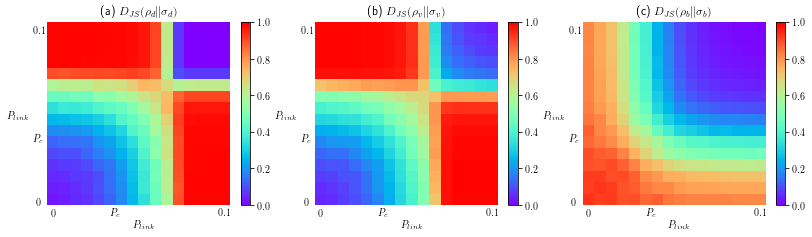

In [7]:
plt.figure(figsize=(11.25,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title(r'(a) $D_{JS}(\rho_d || \sigma_d)$')
plt.imshow(DJS1,cmap='rainbow',origin='lower')
plt.axis('off')
plt.text(-4, 7, r'$P_{link}$', {'color': 'k', 'fontsize': 10})
plt.text(-1.5, -0.5, r'$0$', {'color': 'k', 'fontsize': 10})
plt.text(-1.7, 5, r'$P_c$', {'color': 'k', 'fontsize': 10})
plt.text(-1.7, 14.5, r'$0.1$', {'color': 'k', 'fontsize': 10})

plt.text(-0.2, -1.5, r'$0$', {'color': 'k', 'fontsize': 10})
plt.text(7, -2.5, r'$P_{link}$', {'color': 'k', 'fontsize': 10})
plt.text(5, -1.5, r'$P_c$', {'color': 'k', 'fontsize': 10})
plt.text(14.5, -1.5, r'$0.1$', {'color': 'k', 'fontsize': 10})
plt.clim(0,1)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[0.0,0.2,0.4,0.6,0.8,1.0])


plt.subplot2grid((1,3),(0,1))
plt.title(r'(b) $D_{JS}(\mathcal{\rho}_v || \mathcal{\sigma}_v)$')
plt.imshow(DJS2,cmap='rainbow',origin='lower')
plt.axis('off')
plt.text(-4, 7, r'$P_{link}$', {'color': 'k', 'fontsize': 10})
plt.text(-1.5, -0.5, r'$0$', {'color': 'k', 'fontsize': 10})
plt.text(-1.7, 5, r'$P_c$', {'color': 'k', 'fontsize': 10})
plt.text(-1.7, 14.5, r'$0.1$', {'color': 'k', 'fontsize': 10})

plt.text(-0.2, -1.5, r'$0$', {'color': 'k', 'fontsize': 10})
plt.text(7, -2.5, r'$P_{link}$', {'color': 'k', 'fontsize': 10})
plt.text(5, -1.5, r'$P_c$', {'color': 'k', 'fontsize': 10})
plt.text(14.5, -1.5, r'$0.1$', {'color': 'k', 'fontsize': 10})
plt.clim(0,1)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[0.0,0.2,0.4,0.6,0.8,1.0])

plt.subplot2grid((1,3),(0,2))
plt.title(r'(c) $D_{JS}(\rho_b || \sigma_b)$')
plt.imshow(DJS3,cmap='rainbow',origin='lower')
plt.axis('off')  
plt.text(-4, 7, r'$P_{link}$', {'color': 'k', 'fontsize': 10})
plt.text(-1.5, -0.5, r'$0$', {'color': 'k', 'fontsize': 10})
plt.text(-1.7, 5, r'$P_c$', {'color': 'k', 'fontsize': 10})
plt.text(-1.7, 14.5, r'$0.1$', {'color': 'k', 'fontsize': 10})

plt.text(-0.2, -1.5, r'$0$', {'color': 'k', 'fontsize': 10})
plt.text(7, -2.5, r'$P_{link}$', {'color': 'k', 'fontsize': 10})
plt.text(5, -1.5, r'$P_c$', {'color': 'k', 'fontsize': 10})
plt.text(14.5, -1.5, r'$0.1$', {'color': 'k', 'fontsize': 10})
plt.clim(0,1)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[0.0,0.2,0.4,0.6,0.8,1.0])

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

### The difference between WS small world network and K_regular network

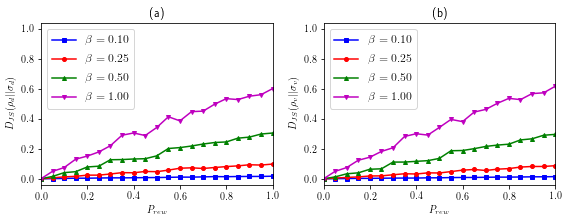

In [8]:
n = 100 
Prew = np.linspace(0,1,21,endpoint=True)
G_regular = nx.watts_strogatz_graph(n, 4, 0.0)
Ar, Lr = fu.cal_AandL(G_regular)


DJS4 = []
DJS5 = []
DJS6 = []
DJS7 = []

DJS8 = []
DJS9 = []
DJS10 = []
DJS11 = []


beta = 0.1
pd1 = fu.cal_density_matrix2(beta, Lr)
pv1 = fu.cal_density_matrix2(beta, -Ar)

for p in Prew:
    G_ws = nx.watts_strogatz_graph(n, 4, p)
    Aws, Lws = fu.cal_AandL(G_ws)
    pd2 = fu.cal_density_matrix2(beta, Lws)
    pv2 = fu.cal_density_matrix2(beta, -Aws)
    DJS4.append(fu.cal_JSD(pd1, pd2))
    DJS8.append(fu.cal_JSD(pv1, pv2))
    

beta = 0.25
pd3 = fu.cal_density_matrix2(beta, Lr)
pv3 = fu.cal_density_matrix2(beta, -Ar)

for p in Prew:
    G_ws = nx.watts_strogatz_graph(n, 4, p)
    Aws, Lws = fu.cal_AandL(G_ws)
    pd4 = fu.cal_density_matrix2(beta, Lws)
    pv4 = fu.cal_density_matrix2(beta, -Aws)
    DJS5.append(fu.cal_JSD(pd3, pd4))
    DJS9.append(fu.cal_JSD(pv3, pv4))
    

beta = 0.5
pd5 = fu.cal_density_matrix2(beta, Lr)
pv5 = fu.cal_density_matrix2(beta, -Ar)

for p in Prew:
    G_ws = nx.watts_strogatz_graph(n, 4, p)
    Aws, Lws = fu.cal_AandL(G_ws)
    pd6 = fu.cal_density_matrix2(beta, Lws)
    pv6 = fu.cal_density_matrix2(beta, -Aws)
    DJS6.append(fu.cal_JSD(pd5, pd6))
    DJS10.append(fu.cal_JSD(pv5, pv6))


beta = 1.0
pd7 = fu.cal_density_matrix2(beta, Lr)
pv7 = fu.cal_density_matrix2(beta, -Ar)

for p in Prew:
    G_ws = nx.watts_strogatz_graph(n, 4, p)
    Aws, Lws = fu.cal_AandL(G_ws)
    pd8 = fu.cal_density_matrix2(beta, Lws)
    pv8 = fu.cal_density_matrix2(beta, -Aws)
    DJS7.append(fu.cal_JSD(pd7, pd8))
    DJS11.append(fu.cal_JSD(pv7, pv8))
    

plt.figure(figsize=(8, 3.2))
plt.subplot(121)
plt.plot(Prew, DJS4, 'bs-', lw=1.5, ms=4, label=r'$\beta=0.10$') 
plt.plot(Prew, DJS5, 'ro-', lw=1.5, ms=4, label=r'$\beta=0.25$')
plt.plot(Prew, DJS6, 'g^-', lw=1.5, ms=4, label=r'$\beta=0.50$')
plt.plot(Prew, DJS7, 'mv-', lw=1.5, ms=4, label=r'$\beta=1.00$')

plt.legend(loc=0,fontsize=12)
plt.axis('tight')
plt.xlabel(r'$P_{rew}$')
plt.ylabel(r'$D_{JS}(\mathcal{\rho}_d || \mathcal{\sigma}_d)$')
plt.title('(a)')

plt.xlim(0,1)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.ylim(-0.04,1.04)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])


plt.subplot(122)
plt.plot(Prew, DJS8, 'bs-', lw=1.5, ms=4, label=r'$\beta=0.10$') 
plt.plot(Prew, DJS9, 'ro-', lw=1.5, ms=4, label=r'$\beta=0.25$')
plt.plot(Prew, DJS10, 'g^-', lw=1.5, ms=4, label=r'$\beta=0.50$')
plt.plot(Prew, DJS11, 'mv-', lw=1.5, ms=4, label=r'$\beta=1.00$')

plt.legend(loc=2,fontsize=12)
plt.axis('tight')
plt.xlabel(r'$P_{rew}$')
plt.ylabel(r'$D_{JS}(\mathcal{\rho}_v || \mathcal{\sigma}_v)$')
plt.title('(b)')

plt.xlim(0,1)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.ylim(-0.04,1.04)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])

plt.tight_layout()
plt.show()